In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import math
from math import exp
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def rfr(X_norm, y):
  best_model_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=45)
    rfr = RandomForestRegressor(n_estimators=250, max_depth=3, criterion='friedman_mse', max_features="sqrt", random_state=i)
    cv_scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_model_rs = i
      best_rmse = avg_rmse

  cv_rmse=best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=45)
  rfr = RandomForestRegressor(n_estimators=250, max_depth=3, criterion='friedman_mse', max_features="sqrt", random_state=best_model_rs)
  rfr.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = rfr.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = rfr.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Model random state:", best_model_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  # Scatter plot for training data
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  # Plotting the line y = x
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  # Scatter plot for test data
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Random Forest Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.gca().grid(False)
  plt.legend()
  plt.show()

  return rfr, test_r2,

In [3]:
def xgboost(X_norm, y):
  best_model_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=50)
    xgb_r = xg.XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.01, subsample= 1.0, reg_alpha=0.7, reg_lambda=0.5, seed =i)
    cv_scores = cross_val_score(xgb_r, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_model_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=50)
  xgb_r = xg.XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.01, subsample= 1.0, reg_alpha=0.7, reg_lambda=0.5, seed=best_model_rs)
  xgb_r.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = xgb_r.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = xgb_r.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Model random state:", best_model_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('XGBoost Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return xgb_r, test_r2

In [4]:
def dtr(X_norm, y):
  best_model_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=60)
    dtr=DecisionTreeRegressor(max_depth=4, min_samples_split=3, min_samples_leaf=1, max_features='auto', random_state=i)
    cv_scores = cross_val_score(dtr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_model_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=60)
  dtr=DecisionTreeRegressor(max_depth=4, min_samples_split=3, min_samples_leaf=1, max_features='auto', random_state=best_model_rs)
  dtr.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = dtr.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = dtr.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Model random state:", best_model_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Decision Tree Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight='bold')
  plt.yticks(fontsize=12, fontweight='bold')
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return dtr, test_r2

In [5]:
def svr(X_norm, y):
  best_rs = -1
  best_rmse = np.inf

  for i in range(1, 201):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=i)
    svr = SVR(kernel='poly',gamma='scale', C=10, epsilon=1, degree=1)
    cv_scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=best_rs)
  svr = SVR(kernel='poly',gamma='scale', C=10, epsilon=1, degree=1)
  svr.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = svr.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = svr.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Random state:", best_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Support Vector Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return svr, test_r2

In [6]:
def enr(X_norm, y):
  best_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=i)
    elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.0)
    cv_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=best_rs)
  elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.0)
  elastic_net_model.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = elastic_net_model.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = elastic_net_model.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Random state:", best_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Elastic Net Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return elastic_net_model, test_r2

In [7]:
data = pd.read_excel("/content/drive/MyDrive/Dataset/Phosp/final/b3lyp/41_dataset_1.xlsx")
data.head()

,ID,Reaction,%ee,ddG_exp_value,d.BL1,d.BL2,d.BL3,d.BL4,d.D1,d.D2,...,CPA_B5(Bmax),CPA_L,d(BE),Traceless_QM,A.Nitroso,A.Indole,A.CPA,V.Nitroso,V.Indole,V.CPA
0,R0004,aa1,64,0.909808,0.78279,0.01504,0.00500,0.57663,-176.61232,23.52332,...,3.27,8.5,0.005408,-5.3209,168.272,211.301,538.661,137.47,168.718,466.146
1,R0005,aa2,86,1.552014,0.81500,0.04768,0.08226,-0.19524,-172.79376,23.72889,...,7.04,8.2,0.006525,-8.1108,168.272,211.301,791.973,137.47,168.718,694.528
2,R0006,aa3,87,1.599696,-0.05567,0.01224,0.06187,-1.57136,-177.04393,0.61468,...,5.69,6.6,0.009486,-7.5545,168.272,211.301,566.192,137.47,168.718,503.718
3,R0007,aa4 (CH2Cl2),96,2.335092,0.76173,0.04037,0.06304,-1.52496,-171.20815,2.32143,...,5.69,6.5,0.007321,-10.4128,168.272,211.301,654.560,137.47,168.718,588.947
4,R0008,aa5,96,2.335092,1.65383,0.03142,0.00520,0.00633,-178.71876,8.31042,...,5.71,8.5,0.006261,-10.4281,168.272,211.301,655.490,137.47,168.718,588.843


In [8]:
data1 = data.drop(['ID', 'Reaction','%ee'], axis=1)
data2 = data1.dropna()
len(data2)

41

In [9]:
len(data2.columns)

27

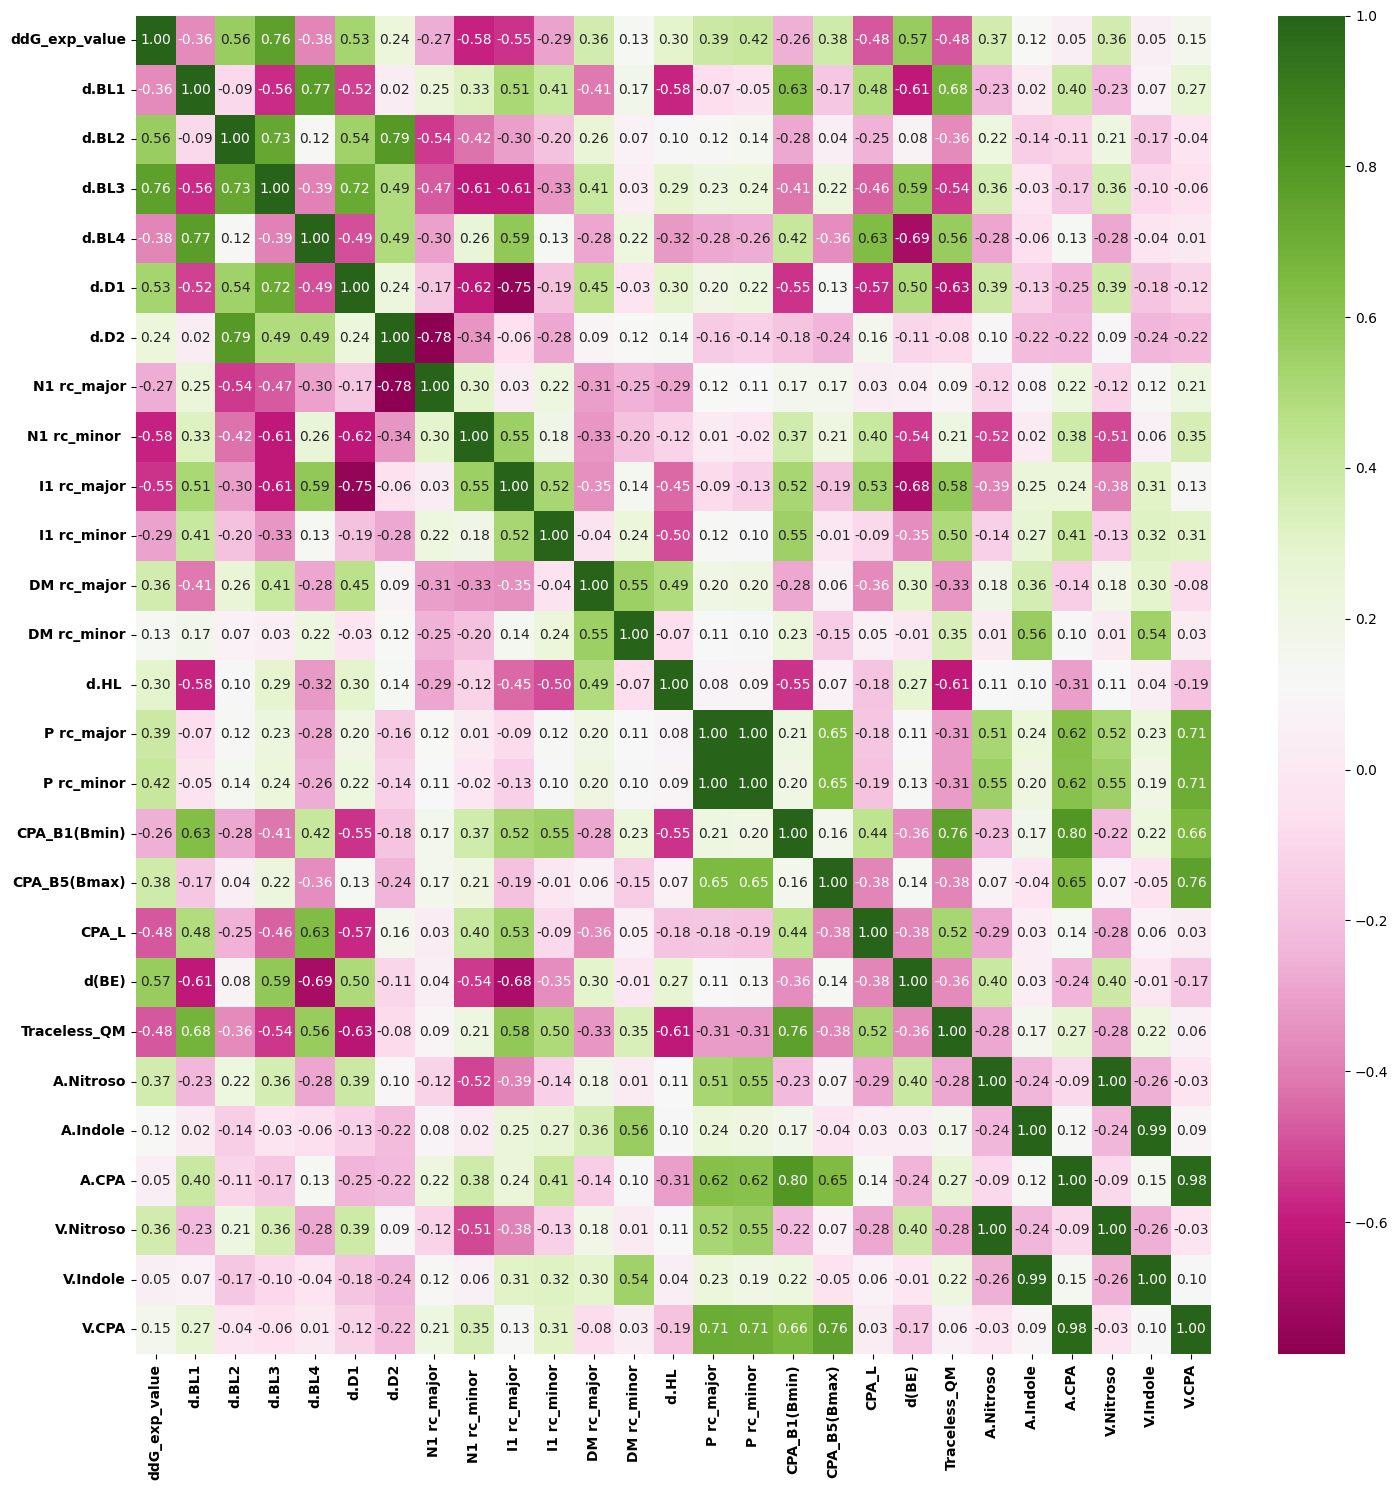

In [10]:
plt.figure(figsize=(15, 15))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='PiYG', fmt=".2f", linewidths=0.0)
#plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90, fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()

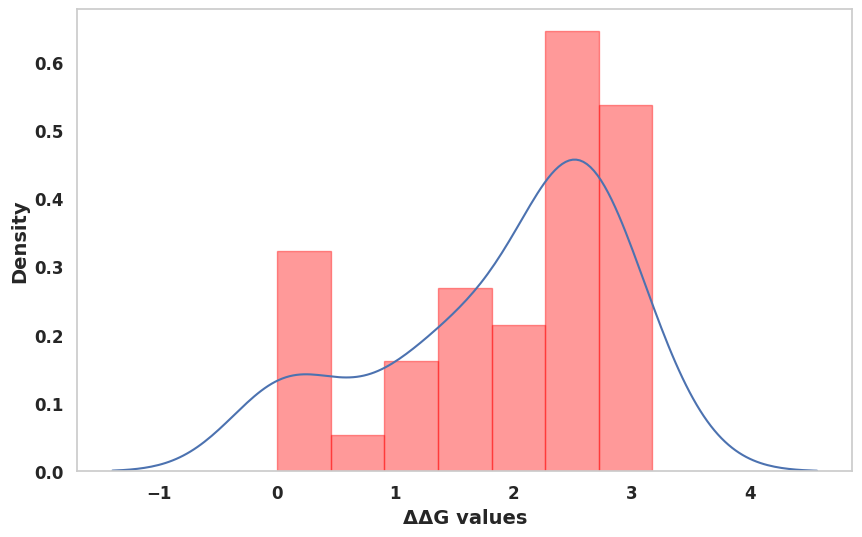

Number of values between 0-1: 8
Number of values between 1-2: 9
Number of values between 2-3: 21
Number of values between 3-4: 3
Peak value of the distribution: 2.5107548640419264


In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot_color='red'
sns.distplot(data2.ddG_exp_value, bins=7, kde=True, hist_kws={"edgecolor": plot_color, "color":plot_color})

#plt.title("Distribution of ΔΔG_exp_value", fontsize=16)
plt.xlabel("ΔΔG values", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.gca().grid(False)
plt.show()

ranges = [(0, 1), (1, 2), (2, 3), (3, 4)]
for start, end in ranges:
    count = ((data2.ddG_exp_value >= start) & (data2.ddG_exp_value < end)).sum()
    print(f"Number of values between {start}-{end}: {count}")

# Calculate and print the peak value of the distribution
mode_result = stats.mode(data2.ddG_exp_value)
peak_value = mode_result.mode
print(f"Peak value of the distribution: {peak_value}")

In [12]:
target_cor = cor['ddG_exp_value']
less_correlated_features = target_cor[abs(target_cor)<0.15].index
data2 = data2.drop(less_correlated_features, axis=1)

In [13]:
X = data2.drop("ddG_exp_value", axis=1)
y = data2[['ddG_exp_value']]
len(X.columns)

22

In [14]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [15]:
X_norm = scaler.transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head()

,d.BL1,d.BL2,d.BL3,d.BL4,d.D1,d.D2,N1 rc_major,N1 rc_minor,I1 rc_major,I1 rc_minor,...,P rc_major,P rc_minor,CPA_B1(Bmin),CPA_B5(Bmax),CPA_L,d(BE),Traceless_QM,A.Nitroso,V.Nitroso,V.CPA
0,0.291087,0.161615,0.168571,1.000000,0.321186,0.955993,0.00000,0.111111,0.405405,0.302326,...,0.000000,0.000000,0.018987,0.000000,0.470588,0.406037,0.820914,0.0,0.0,0.000000
1,0.299866,0.666409,0.904381,0.691994,0.757641,0.962159,0.40625,0.666667,0.405405,0.534884,...,0.859656,0.821629,0.449367,1.000000,0.400000,0.541991,0.449413,0.0,0.0,0.997606
2,0.062568,0.118311,0.710190,0.142868,0.271854,0.268777,0.81250,0.111111,0.459459,0.511628,...,0.177775,0.152790,0.000000,0.641910,0.023529,0.902386,0.523489,0.0,0.0,0.164120
3,0.285347,0.553356,0.721333,0.161383,0.938873,0.319977,0.87500,0.277778,0.054054,0.511628,...,0.535778,0.517739,0.006329,0.641910,0.000000,0.638875,0.142880,0.0,0.0,0.536413
4,0.528485,0.414940,0.170476,0.772428,0.080424,0.499635,1.00000,0.500000,0.432432,0.186047,...,0.530497,0.510612,0.018987,0.647215,0.470588,0.509859,0.140843,0.0,0.0,0.535959


In [16]:
models = [rfr, xgboost, dtr,svr, enr]

Cross Validation RMSE:  0.664074614669519
Model random state: 100
Training set RMSE:  0.3555454221237221
Training set R2 Score:  0.8781719231964755
Test RMSE:  0.3278469397273116
Test R2 Score:  0.8451700476714432


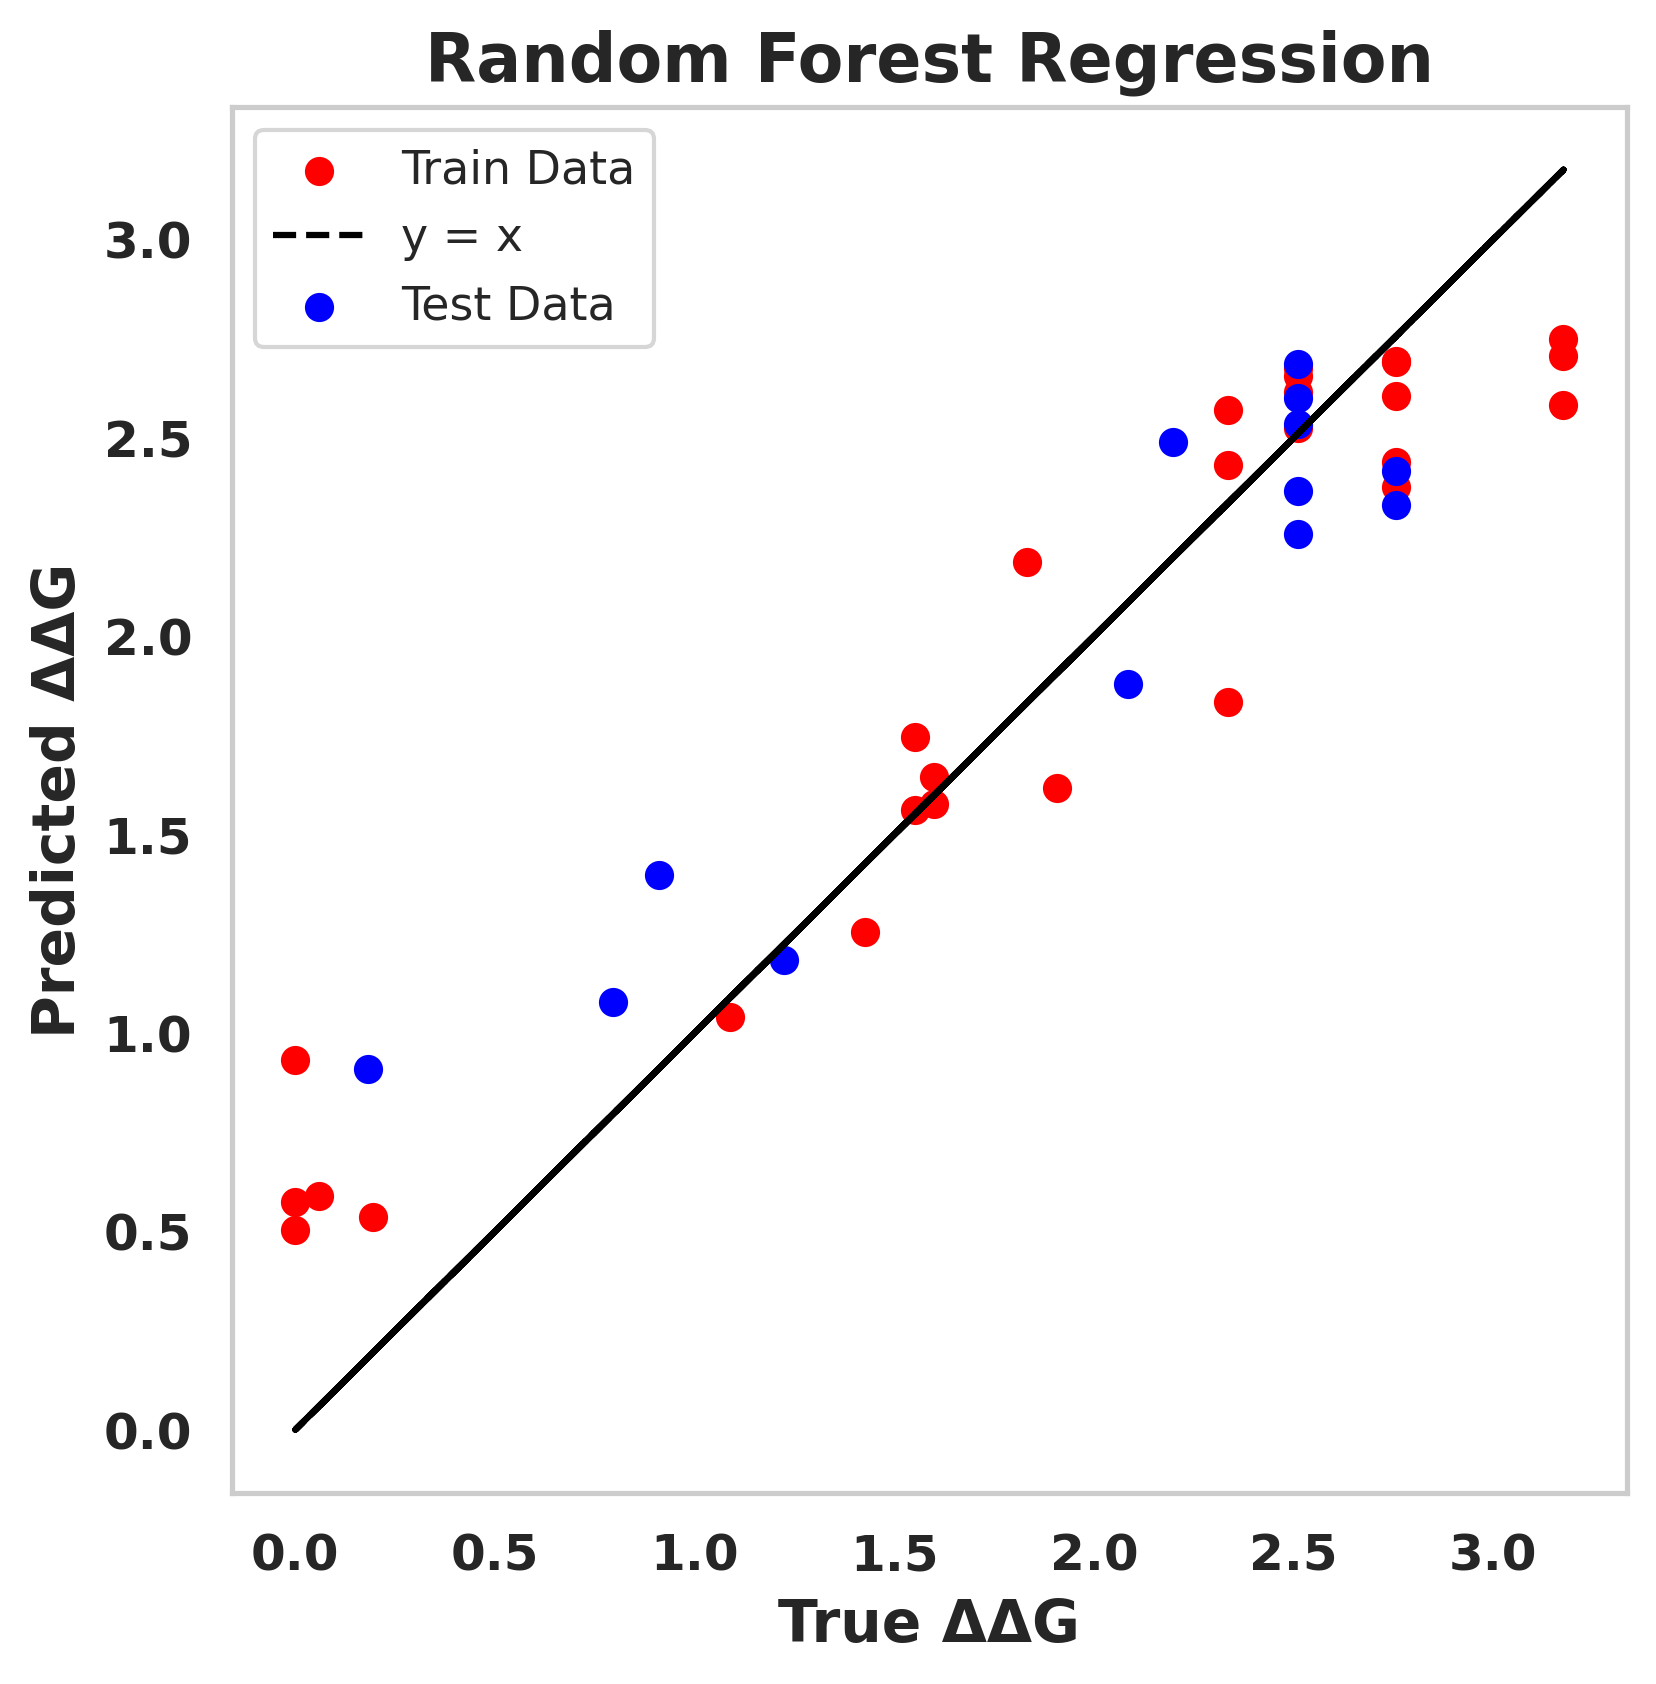

Cross Validation RMSE:  0.5698974839156548
Model random state: 1
Training set RMSE:  0.14542425960217256
Training set R2 Score:  0.9759593109487565
Test RMSE:  0.4789955143893763
Test R2 Score:  0.773232486863278


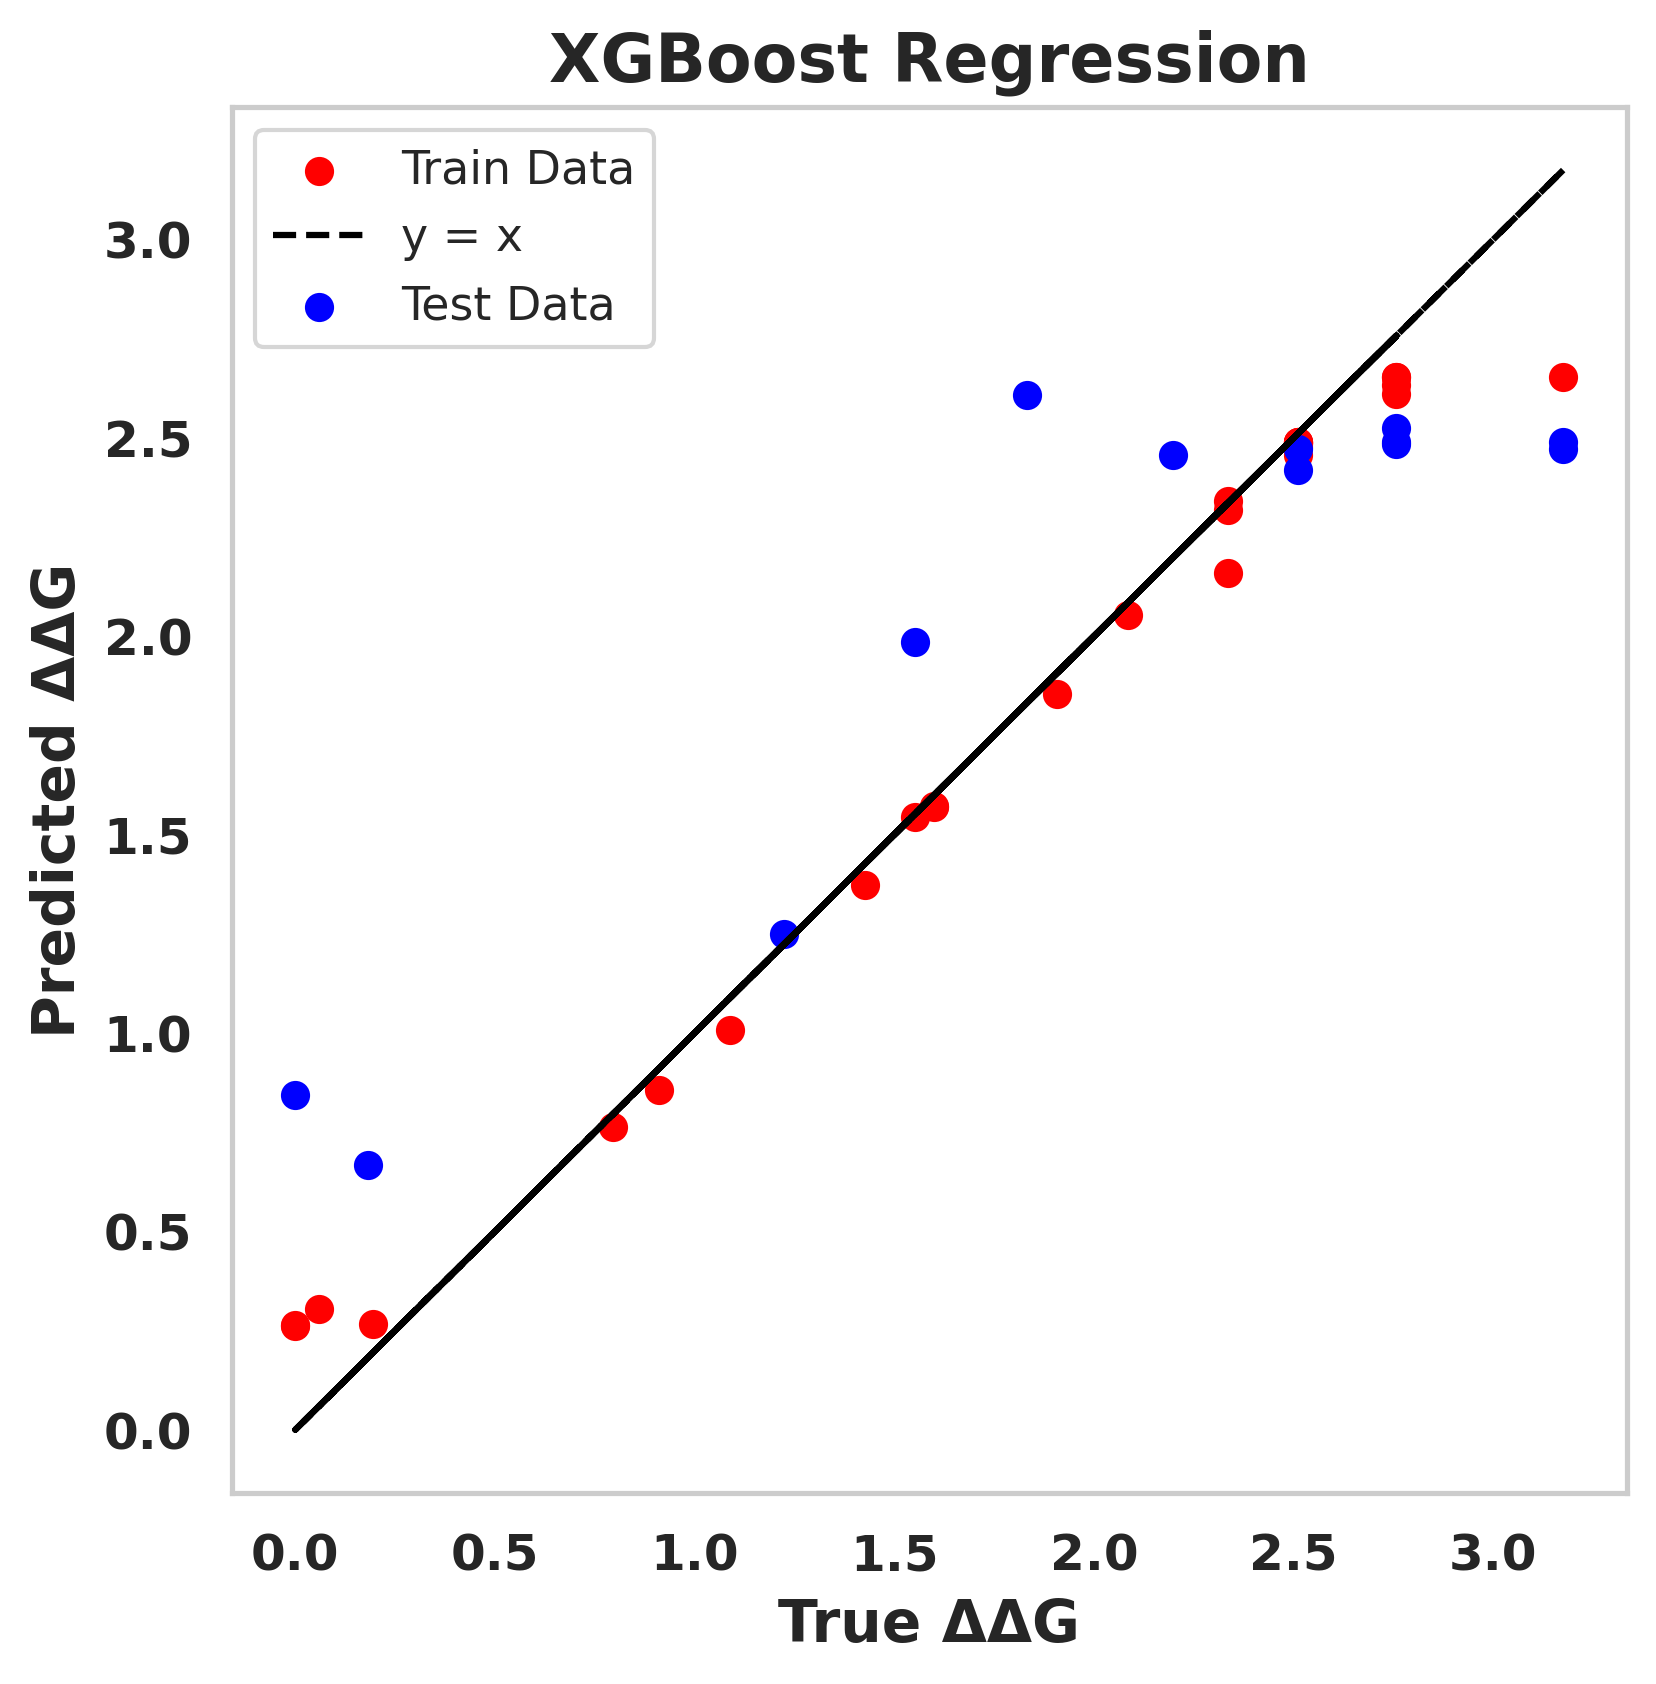

Cross Validation RMSE:  0.6541694005192991
Model random state: 86
Training set RMSE:  0.14908742267533
Training set R2 Score:  0.9781075366589946
Test RMSE:  0.4278775009927684
Test R2 Score:  0.753278389953435


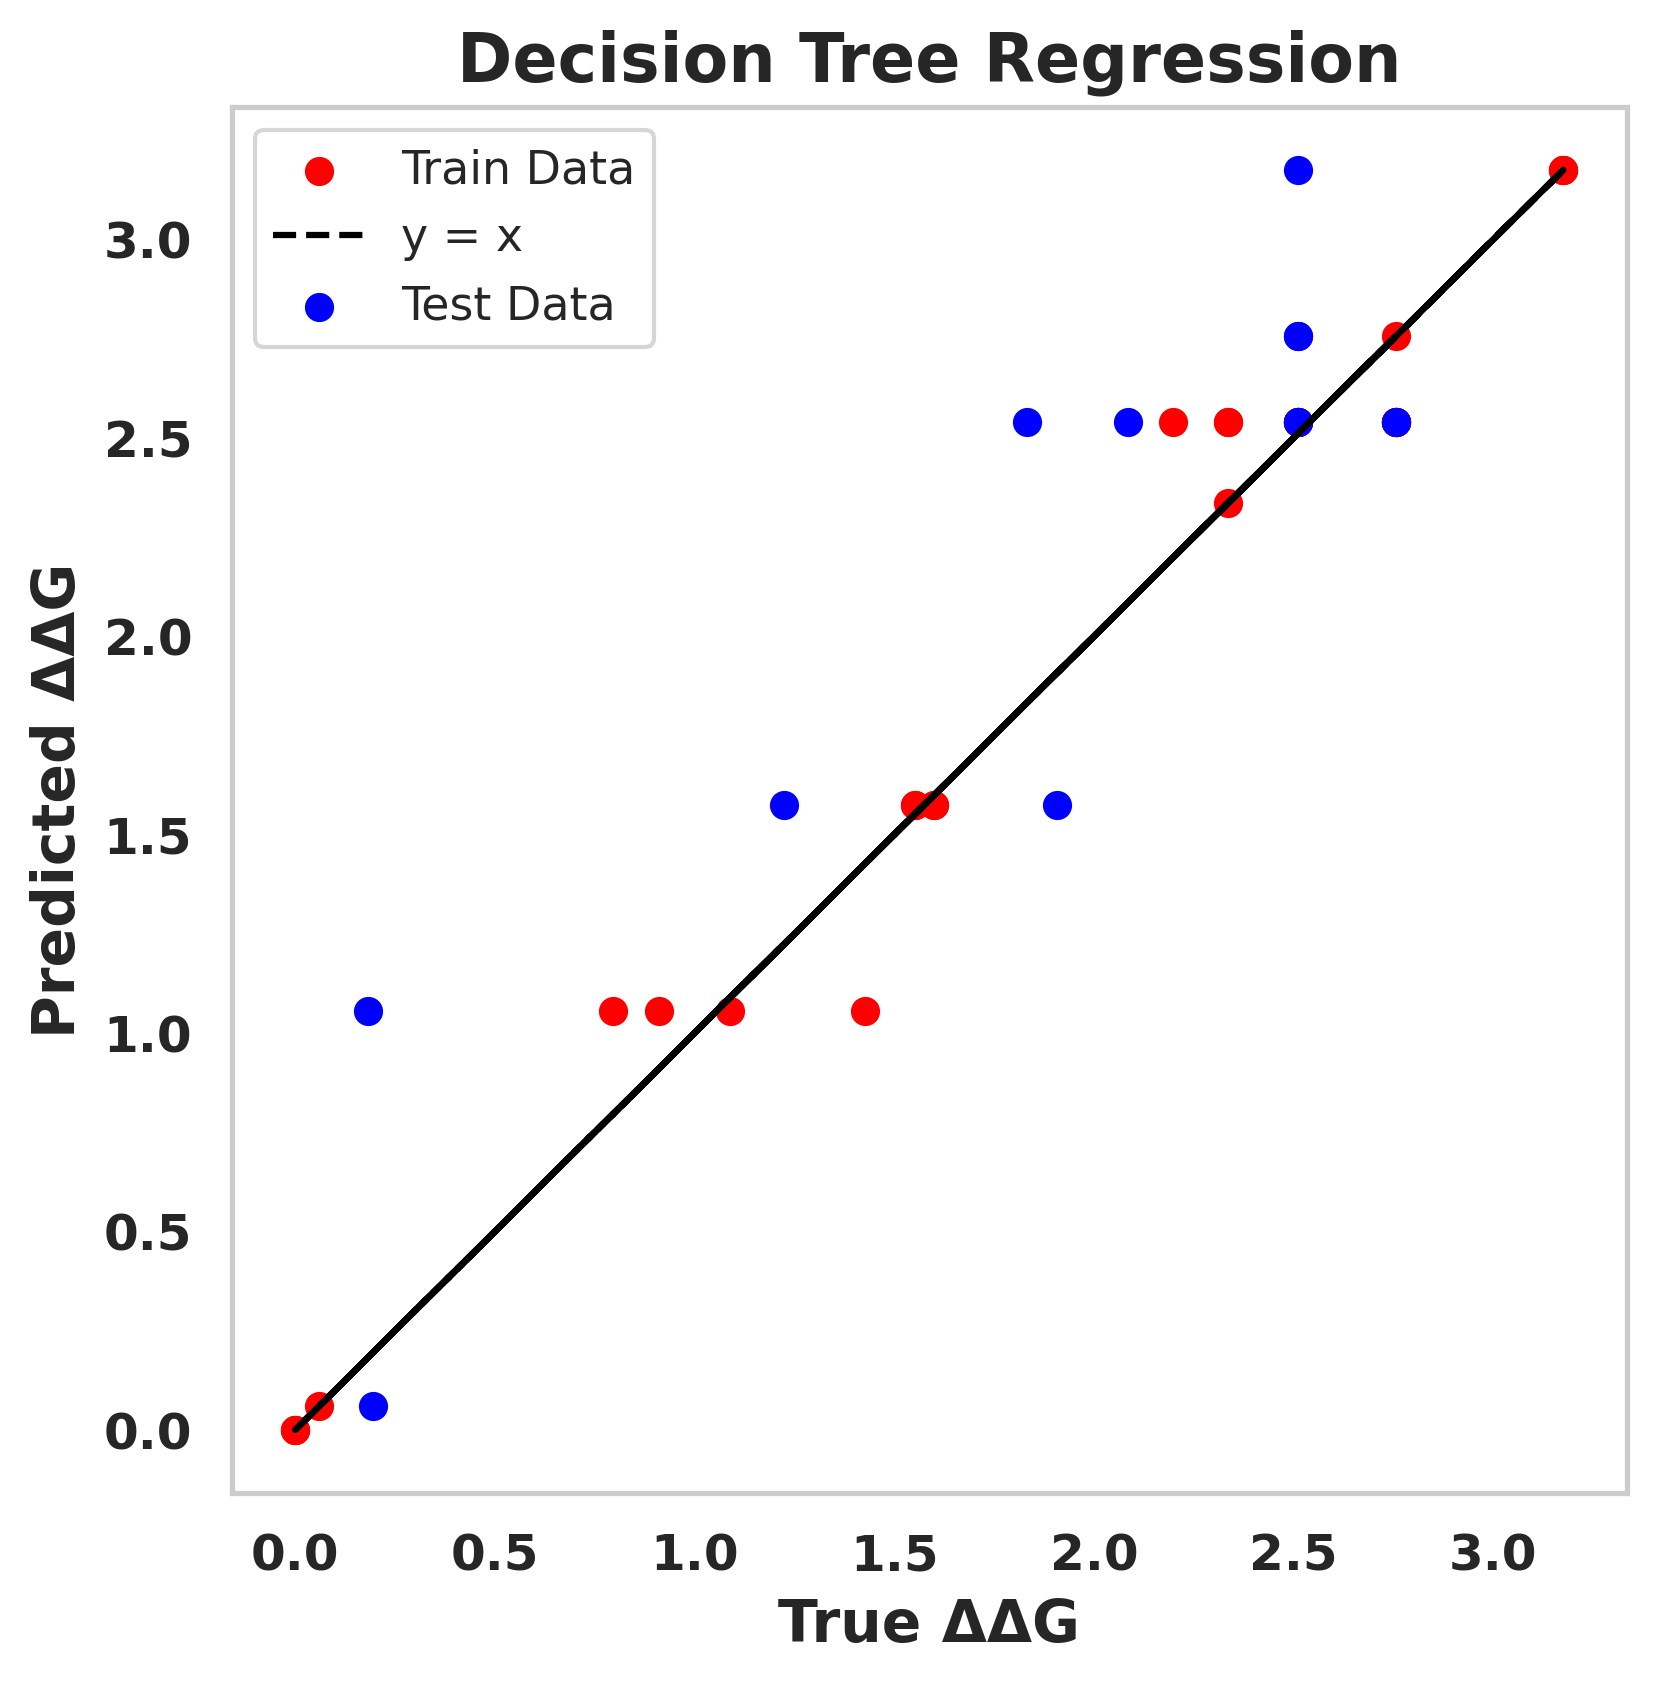

Cross Validation RMSE:  0.5270898126151814
Random state: 117
Training set RMSE:  0.5374702858456926
Training set R2 Score:  0.505791099092237
Test RMSE:  1.027225783323706
Test R2 Score:  0.2910296076698796


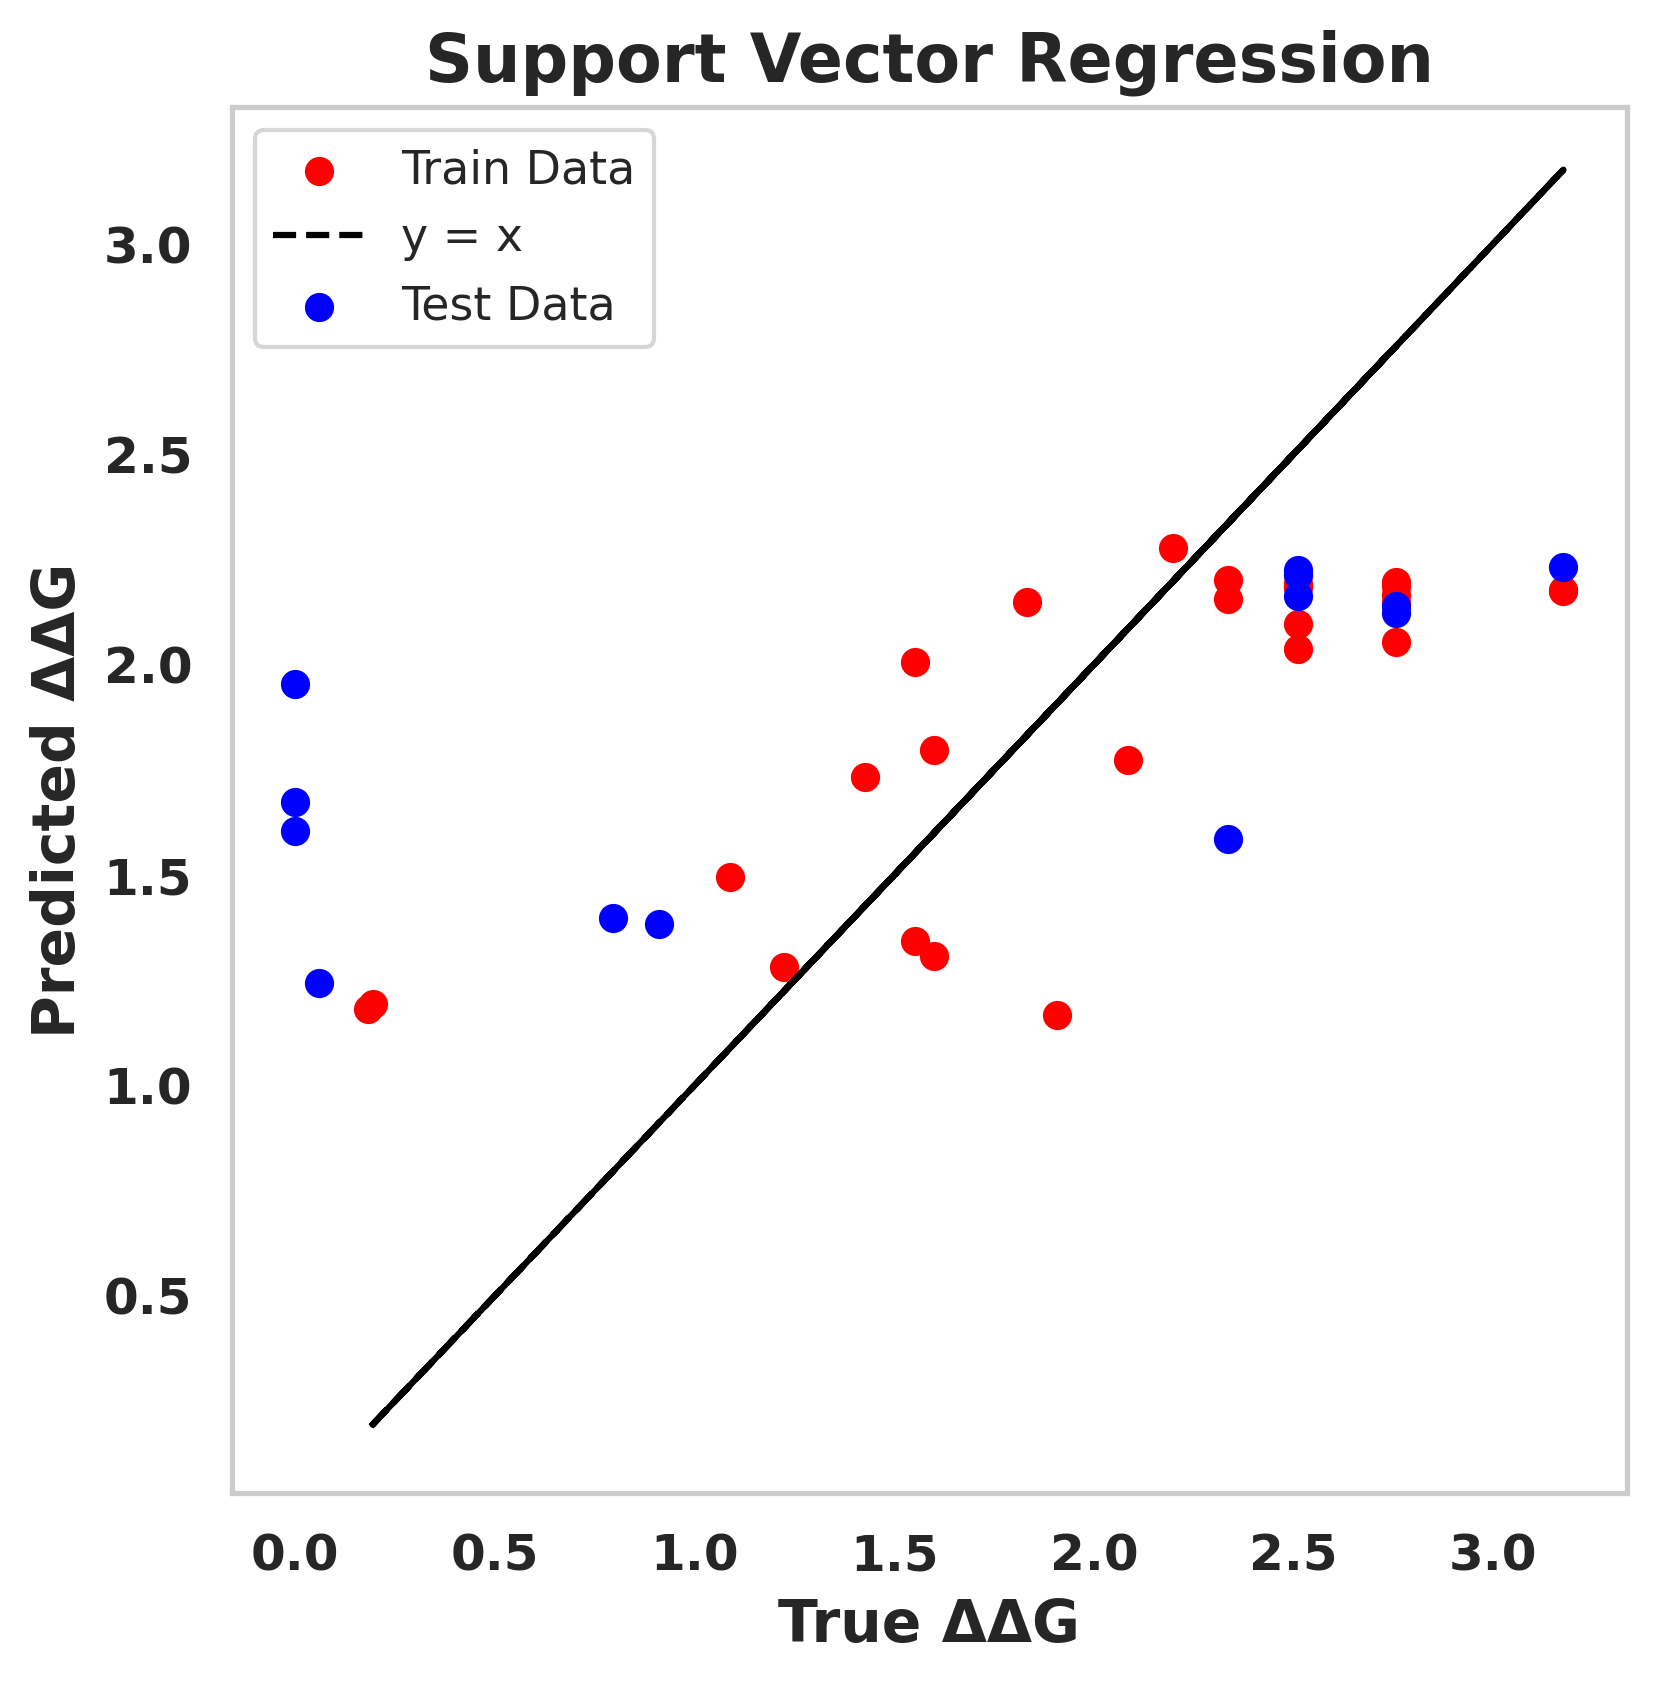

Cross Validation RMSE:  0.47602314045066735
Random state: 3
Training set RMSE:  0.4136328496049901
Training set R2 Score:  0.7714779730077435
Test RMSE:  1.0003162823724459
Test R2 Score:  0.15788301106997082


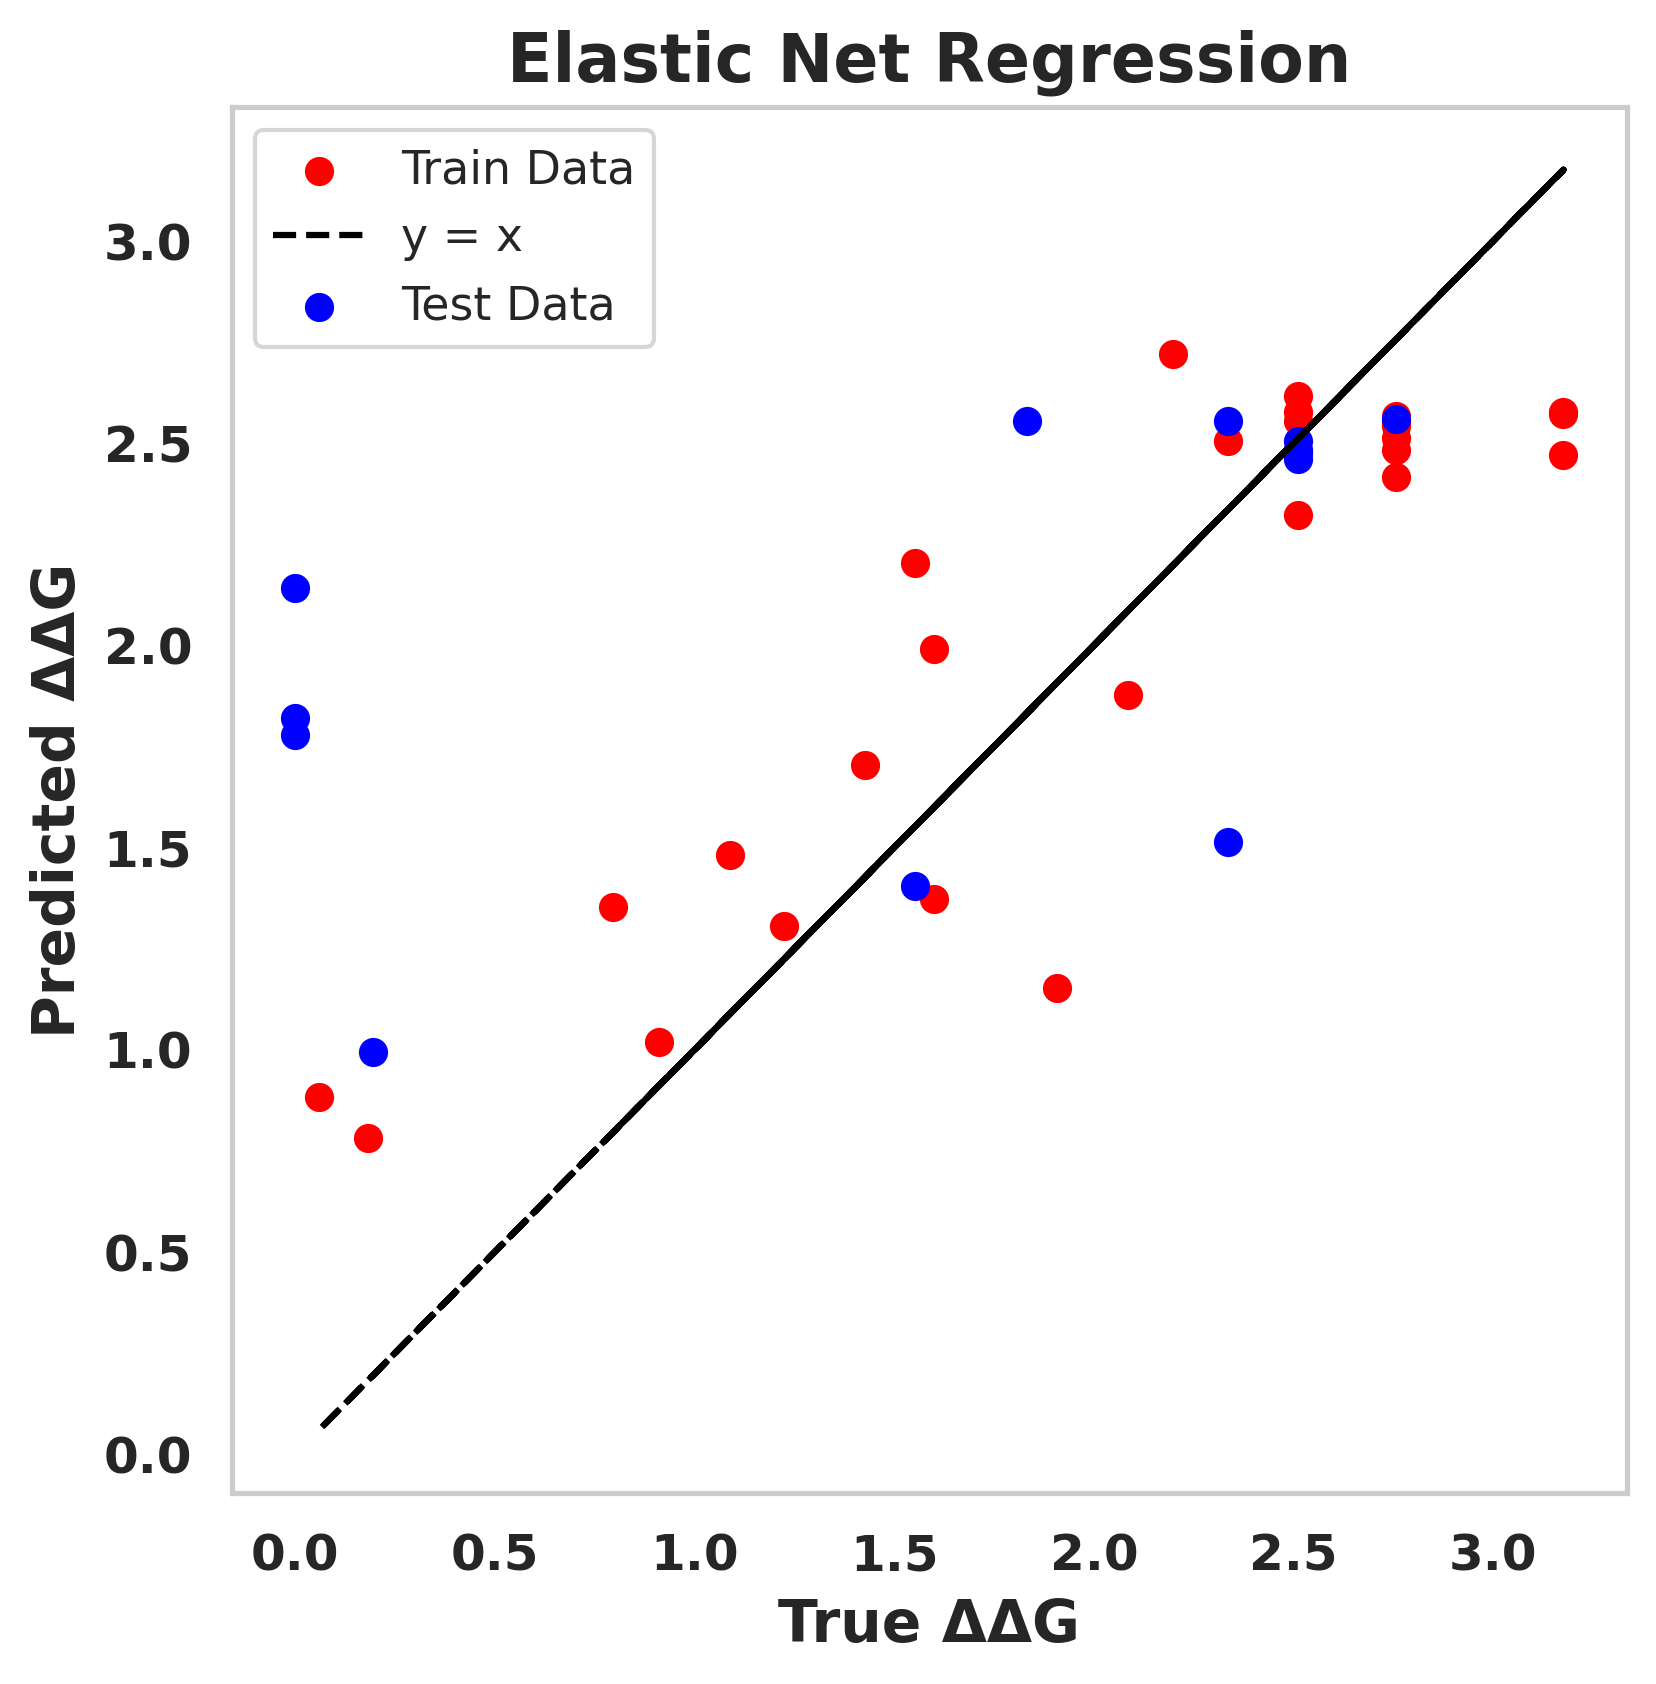

Best Test R2 Score: 0.8451700476714432
Best Model: RandomForestRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', n_estimators=250, random_state=100)


In [17]:
best_test_r2 = -np.inf
best_model = None

for model in models:
    model_result = model(X_norm, y)  # model_result is a tuple containing (model, test_r2)
    test_r2 = model_result[1]

    if best_test_r2 < test_r2:
        best_test_r2 = test_r2
        best_model = model_result[0]  # Extract the model object

print(f"Best Test R2 Score: {best_test_r2}")
print(f"Best Model: {best_model}")

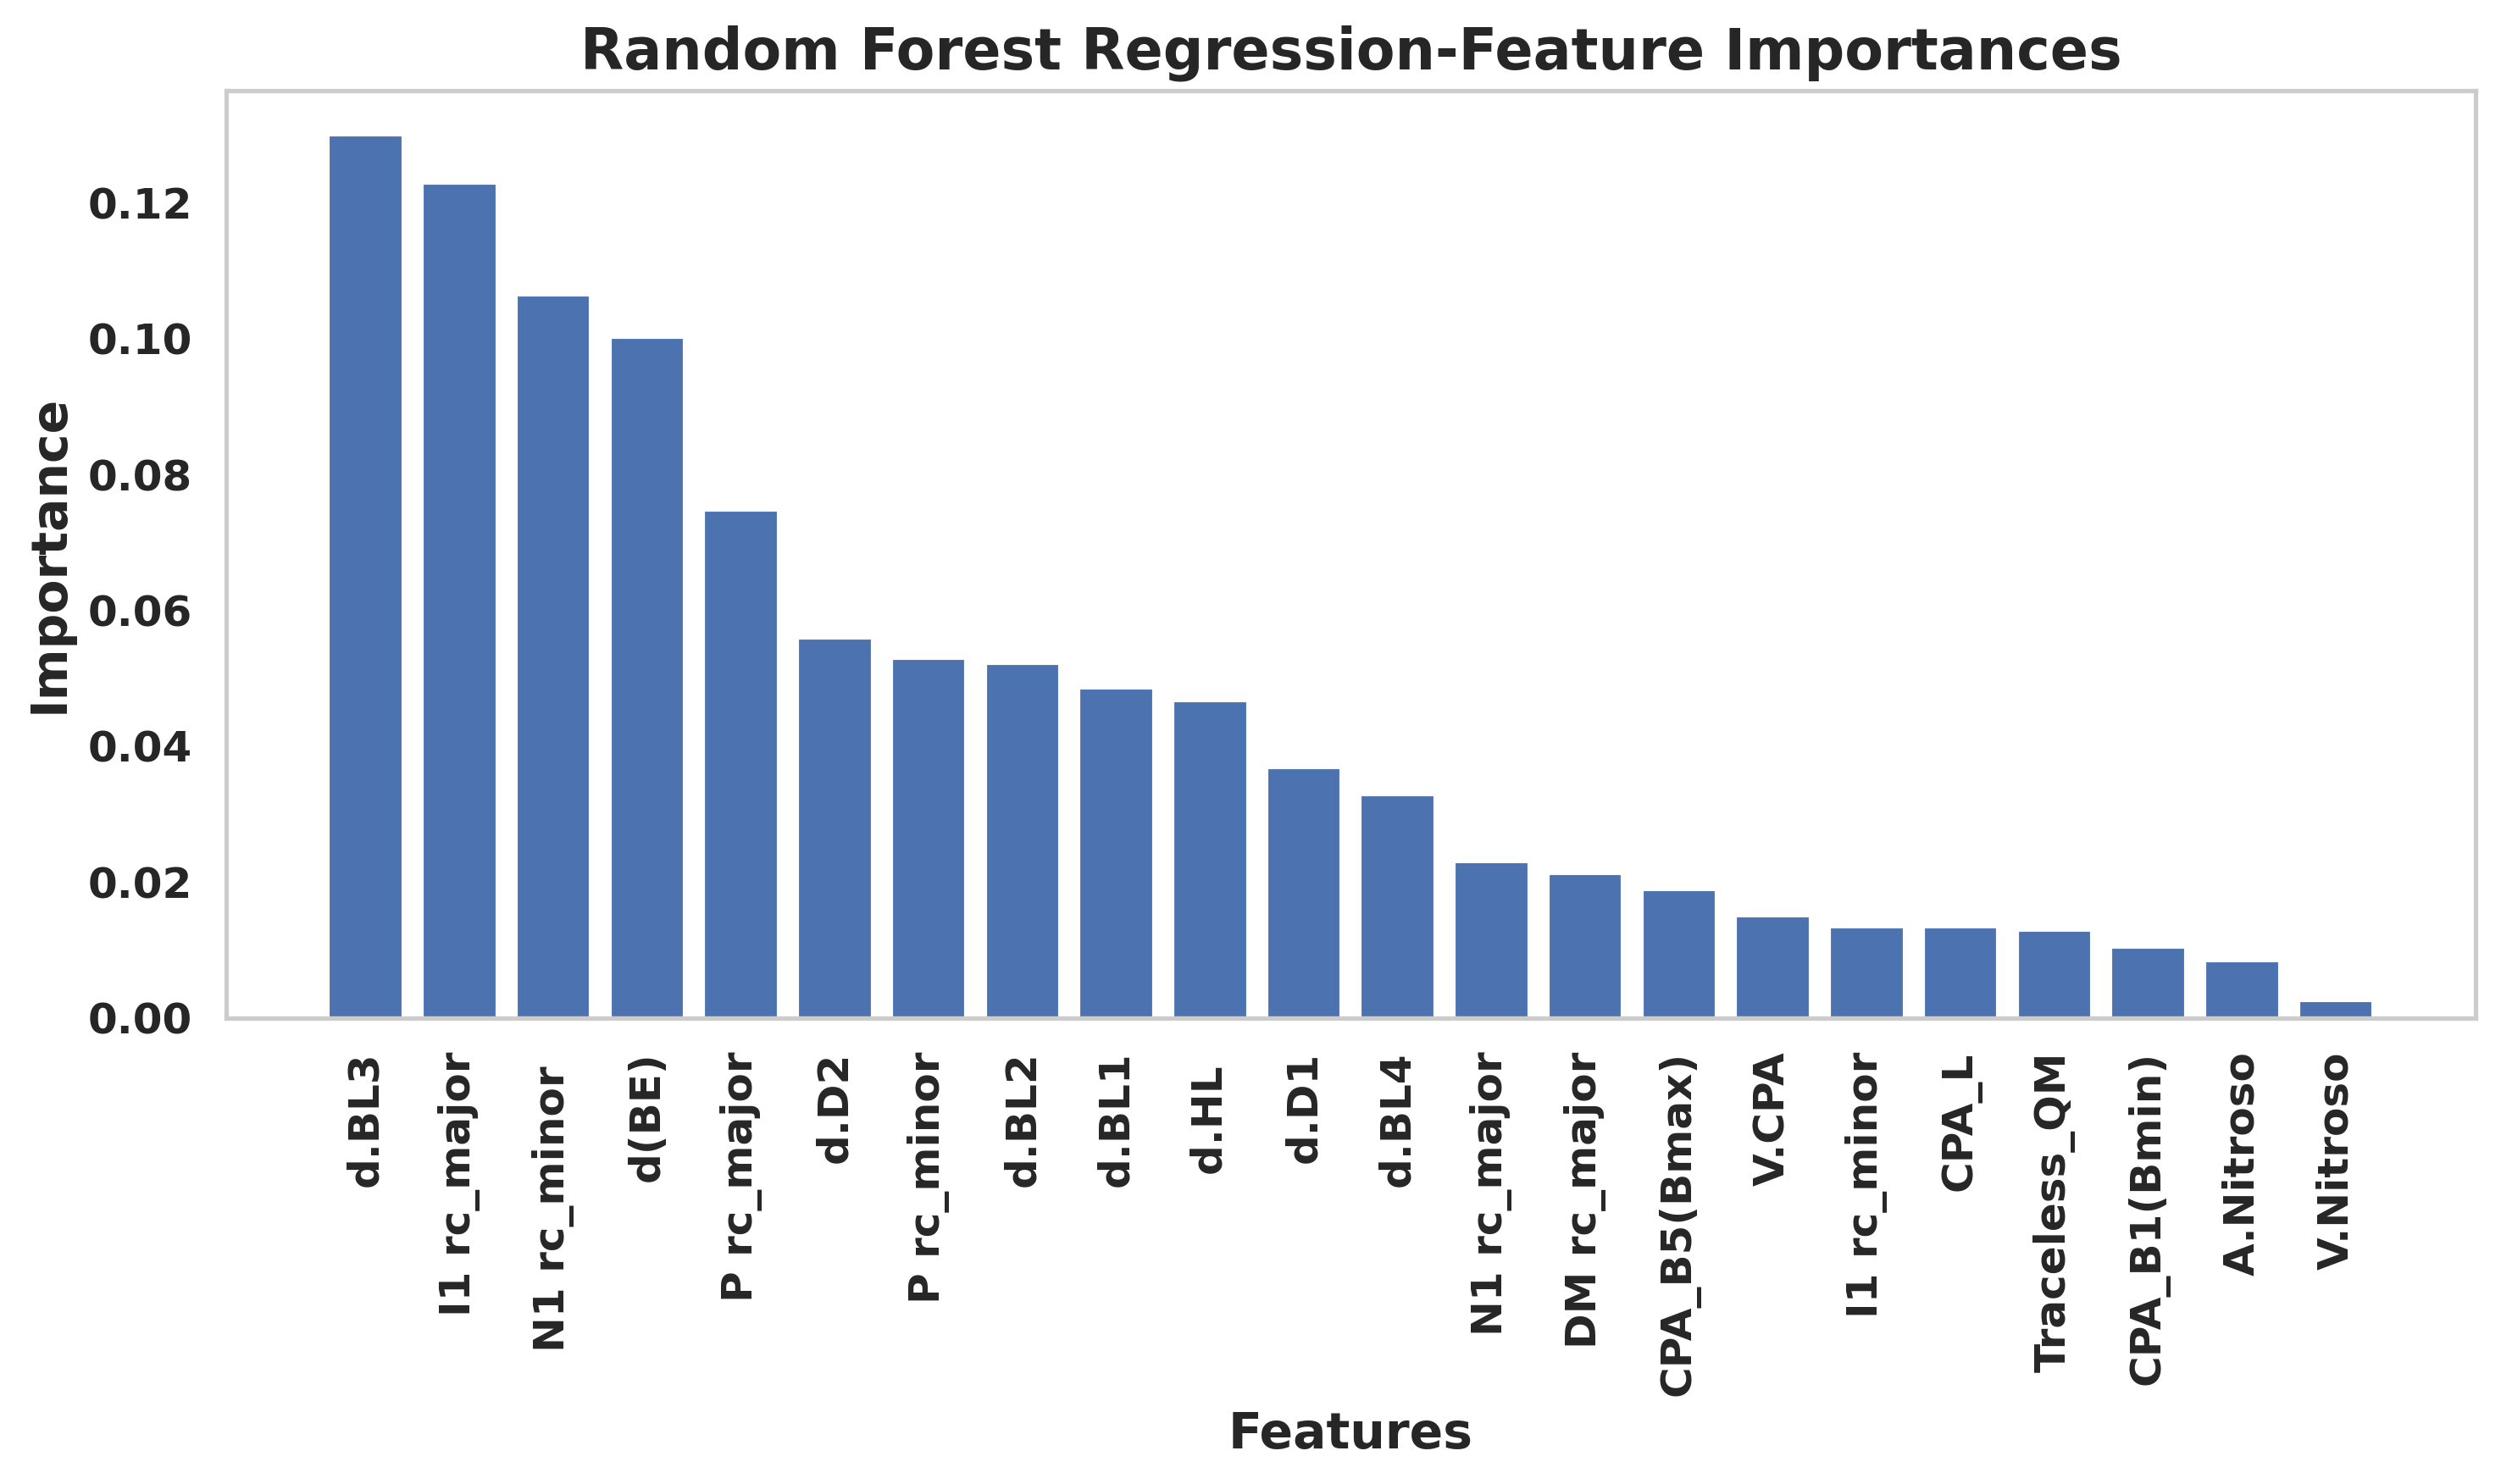

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=45)
rfr = RandomForestRegressor(n_estimators=250, max_depth=3, criterion='friedman_mse', max_features="sqrt", random_state=100)
rfr.fit(X_train, y_train)

importances = rfr.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90, fontsize=12, fontweight='bold')
plt.xlabel('Features', fontweight='bold', fontsize=14)
plt.ylabel('Importance', fontweight='bold', fontsize=14)
plt.title('Random Forest Regression-Feature Importances', fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=12)
plt.gca().grid(False)
plt.tight_layout()
plt.show()